In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [50]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from scipy.stats import expon, anderson, probplot, sem
import math

import matplotlib.pyplot as plt

from copy import deepcopy

import pickle

In [3]:
x_goal = np.array([0.9, 0.9])

In [4]:
# r_n function
def r(n, D):
    return (n ** (-1/(2*D))) / 5 

In [30]:
n = 100000
D = 2

In [31]:
distances = []
S_n = []
counts = []

#g = open('slurm scripts/data/06-24-20/asymptotics-dim2_n50000.out', 'r')
#for line in g:
#    distances.append(float(line))

filename = 'slurm scripts/data/07-02-20/path_points/'
for i in range(1,501):
    #if distances[i] == float('inf'):
    #    S_n.append(float('inf'))
    #    continue
    f = open(filename+str(i)+'-dim2-n100000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    s_n = 0
    for j in range(len(pathpoints)-2):
        s_n += np.linalg.norm(pathpoints[j+1] - pathpoints[j])
    S_n.append(s_n)
    distances.append(s_n + np.linalg.norm(pathpoints[-1] - pathpoints[-2]))
    counts.append(len(pathpoints)-2)
    
    if pathpoints[-1][0] != 0.9 or pathpoints[-1][1] != 0.9:
        print(i)

        
distances = np.array(distances)
S_n = np.array(S_n)
counts = np.array(counts)

In [32]:
edge_lengths = []
angle_displacements = []
for i in range(1, 501):
    f = open(filename+str(i)+'-dim2-n100000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
        
        #if j == len(pathpoints)-3:
        #    continue
        
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angle_displacements.append(angle)

In [33]:
max (counts)

152

Text(0.5, 1.0, '18 bins')

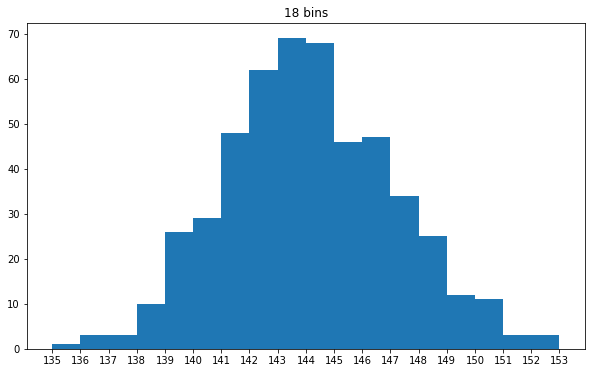

In [34]:
num = 18
plt.figure(figsize=(10, 6))
plt.hist(counts, range(135, 154))
plt.xticks(range(135, 154))
plt.title(str(num) + ' bins')

In [60]:
# 1 / mean(counts)
1 / np.mean(counts)

0.006962236827447922

In [61]:
# mean(1 / counts)

np.mean(1 / counts)

0.006965302484811355

In [43]:
anderson(x=counts, dist='norm')

AndersonResult(statistic=2.6271191394595803, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [46]:
plot = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

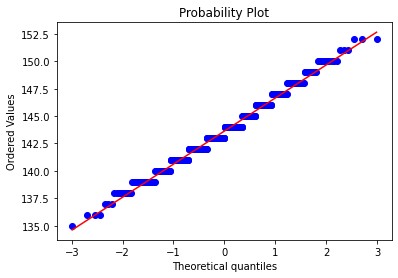

In [48]:
probplot(x=counts, plot=plt)
plt.show()

In [25]:
print(np.mean(counts))
print(np.std(counts - np.mean(counts)) ** 2)

143.632
9.100575999999998


In [49]:
T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D)) * math.cos(math.pi / 39.738353063184405)
print(T)

150.42071956712851


In [35]:
( r(n,D) ** 2) * math.pi * 100000

39.738353063184405

Text(0.5, 1.0, '20 bins')

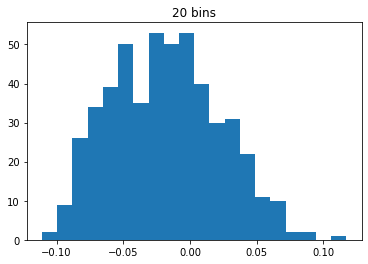

In [57]:
T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D) * math.cos(math.pi / 39.738353063184405))

lengths = deepcopy(S_n)
lengths = lengths - ((T) * (2/3) * r(n,D))
#lengths /= ((T) * (2/3) * r(n,D))
lengths = lengths * (T ** (1/2))
lengths = lengths 

# new expectation

num = 20
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

In [51]:
print(np.mean(lengths))
print(sem(lengths))

-0.04535512378323967
0.004546037610989692


In [58]:
print(np.std(lengths))

0.04062031515841481


Text(0.5, 1.0, '50 bins')

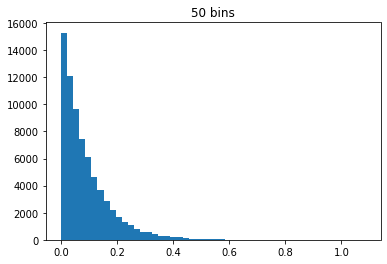

In [38]:
num = 50
plt.hist(np.abs(angle_displacements), bins=num)
plt.title(str(num) + ' bins')

Text(0.5, 1.0, '100 bins')

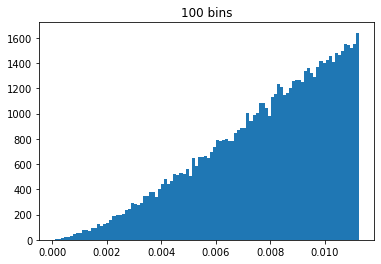

In [41]:
num = 100
plt.hist(edge_lengths, bins=num)
plt.title(str(num) + ' bins')

In [67]:
( (r(1000000,D)/2) ** 2) * math.pi * 1000000

31.41592653589792

In [ ]:
# ellipse equation: (x-0.5)^2 - 1.8(x-0.5)(y-0.5) + (y-0.5)^2 < 0.05